## Answering the Science Question

My experiment is largely unsuccessful. As such I will not be making a movie visualization file since my model results are inconclusive.


1. I'm unable to run a successful model with the obcs & exf package enabled. The model eventually crashes due to numerical instabilities in CALC_R_STAR which I'm unable to resolve. My successful model runs are from disabling both of those packages.
2. The plots in this notebook shows that the sea elevation initial conditions that I made to simulate the tsunamis  were indeed ran by my model but in the end for some reason there seems to be no difference in both velocities and elevation for run with tsunamis and run without tsunami.


  


In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [61]:
project_directory = '/Users/account/Desktop/CS 185C/cs185c_fall2024/homework/project'

In [62]:
# define the parameters that will be used in the data file
delX = 1/10
delY = 1/16
xgOrigin = 128
ygOrigin = 23
n_rows = 360
n_cols = 360

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX+delX/2, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

*Plot a model field at one timestep*

Plot differences between model results with and without tsunamis

It shows that in the first timestep there is a Gaussian bump in the sea elevation in the Sea of Japan. and that the sea velocity is moving similarly to how the tsunami should expand. 


In [63]:
grid_elevation_Japan_tsunami = np.fromfile(os.path.join(project_directory, 'run_Japan_tsunami', 'diags', 
                                              'EtaN_5min_mean',
                                              'EtaN_mean.0000000001.data'), '>f4')
grid_elevation_Japan_tsunami = grid_elevation_Japan_tsunami.reshape((n_rows, n_cols))

grid_elevation_no_tsunami = np.fromfile(os.path.join(project_directory, 'run_no_tsunami', 'diags', 
                                              'EtaN_5min_mean',
                                              'EtaN_mean.0000000001.data'), '>f4')
grid_elevation_no_tsunami = grid_elevation_no_tsunami.reshape((n_rows, n_cols))



grid_vel_Japan_tsunami = np.fromfile(os.path.join(project_directory, 'run_Japan_tsunami', 'diags', 
                                              'vel_5min_mean',
                                              'vel_mean.0000000003.data'), '>f4')
grid_vel_Japan_tsunami = grid_vel_Japan_tsunami.reshape((2, 50, n_rows, n_cols))

grid_vel_no_tsunami = np.fromfile(os.path.join(project_directory, 'run_no_tsunami', 'diags', 
                                              'vel_5min_mean',
                                              'vel_mean.0000000003.data'), '>f4')
grid_vel_no_tsunami = grid_vel_no_tsunami.reshape((2, 50, n_rows, n_cols))

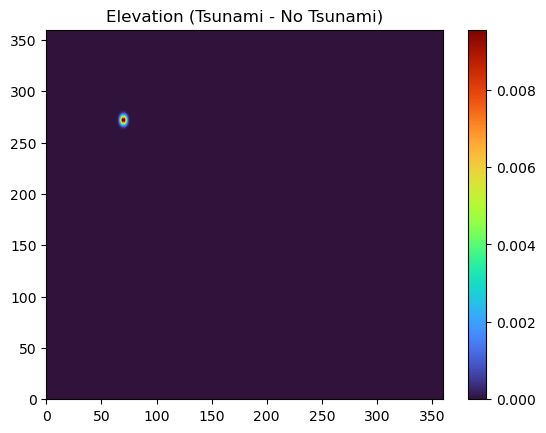

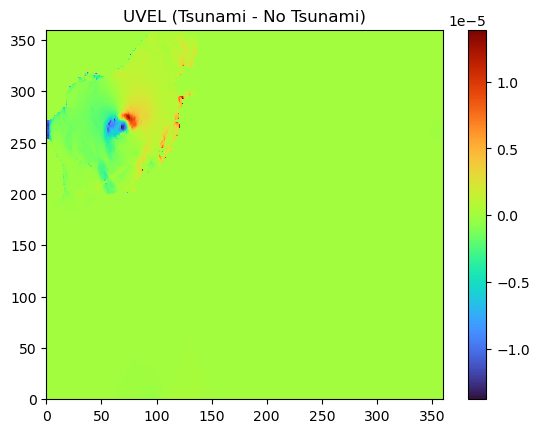

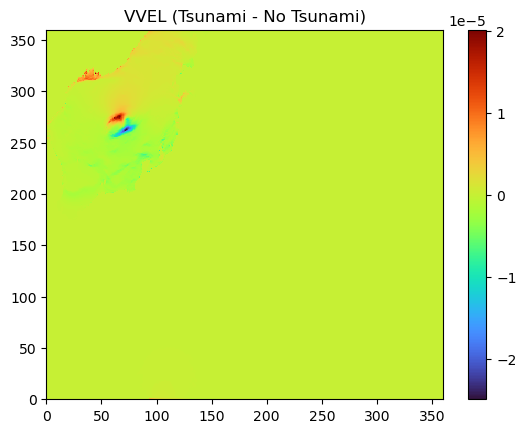

In [64]:
# plot the differences
C = plt.pcolormesh(grid_elevation_Japan_tsunami[:,:]-grid_elevation_no_tsunami[:,:],
                   cmap='turbo')
plt.colorbar(C)
plt.title('Elevation (Tsunami - No Tsunami)')
plt.show()


C = plt.pcolormesh(grid_vel_Japan_tsunami[0, 0, :,:]-grid_vel_no_tsunami[0, 0, :,:],
                   cmap='turbo')
plt.colorbar(C)
plt.title('UVEL (Tsunami - No Tsunami)')
plt.show()

C = plt.pcolormesh(grid_vel_Japan_tsunami[1, 0, :,:]-grid_vel_no_tsunami[1, 0, :,:],
                   cmap='turbo')
plt.colorbar(C)
plt.title('VVEL (Tsunami - No Tsunami)')
plt.show()

Picking a spot near the coast of Japan to observe the changes
at row 250 and column 115

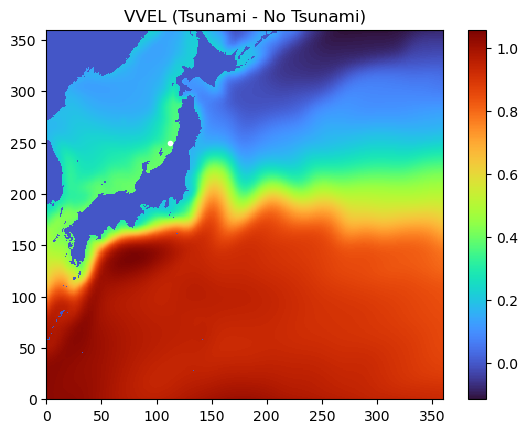

In [72]:
row = 250
col = 115

C = plt.pcolormesh(grid_elevation_Japan_tsunami[:,:],
                   cmap='turbo')
plt.plot(112,250, 'w.')
plt.colorbar(C)
plt.title('VVEL (Tsunami - No Tsunami)')
plt.show()

## Generate a time series for both velocites and elevation

In [73]:
timestep_dates = []
UVEL_tsunami_values = []
UVEL_no_tsunami_values = []
for file_name in sorted(os.listdir(os.path.join(project_directory,'run_no_tsunami','diags','vel_5min_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(1200*timestep_number)

        # read in the grid with the wind
        grid_tsunami = np.fromfile(os.path.join(project_directory,'run_Japan_tsunami','diags',
                                             'vel_5min_mean',
                                             file_name), '>f4')
        grid_tsunami = grid_tsunami.reshape((2, 50, n_rows,n_cols))
        
        # read in the grid without the wind
        grid_no_tsu = np.fromfile(os.path.join(project_directory,'run_no_tsunami','diags',
                                             'vel_5min_mean',
                                             file_name), '>f4')
        grid_no_tsu = grid_no_tsu.reshape((2, 50, n_rows,n_cols))

        UVEL_tsunami_values.append(grid_tsunami[0, 0, row,col])
        UVEL_no_tsunami_values.append(grid_no_tsu[0, 0, row,col])

In [74]:
timestep_dates = []
VVEL_tsunami_values = []
VVEL_no_tsunami_values = []
for file_name in sorted(os.listdir(os.path.join(project_directory,'run_no_tsunami','diags','vel_5min_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(1200*timestep_number)

        # read in the grid with the wind
        grid_tsunami = np.fromfile(os.path.join(project_directory,'run_Japan_tsunami','diags',
                                             'vel_5min_mean',
                                             file_name), '>f4')
        grid_tsunami = grid_tsunami.reshape((2, 50, n_rows,n_cols))
        
        # read in the grid without the wind
        grid_no_tsu = np.fromfile(os.path.join(project_directory,'run_no_tsunami','diags',
                                             'vel_5min_mean',
                                             file_name), '>f4')
        grid_no_tsu = grid_no_tsu.reshape((2, 50, n_rows,n_cols))

        VVEL_tsunami_values.append(grid_tsunami[1, 0, row,col])
        VVEL_no_tsunami_values.append(grid_no_tsu[1, 0, row,col])

In [75]:
timestep_dates = []
elevation_tsunami_values = []
elevation_no_tsunami_values = []
for file_name in sorted(os.listdir(os.path.join(project_directory,'run_no_tsunami','diags','EtaN_5min_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(1200*timestep_number)

        # read in the grid with the wind
        grid_tsunami = np.fromfile(os.path.join(project_directory,'run_Japan_tsunami','diags',
                                             'EtaN_5min_mean',
                                             file_name), '>f4')
        grid_tsunami = grid_tsunami.reshape((n_rows,n_cols))
        
        # read in the grid without the wind
        grid_no_tsu = np.fromfile(os.path.join(project_directory,'run_no_tsunami','diags',
                                             'EtaN_5min_mean',
                                             file_name), '>f4')
        grid_no_tsu = grid_no_tsu.reshape((n_rows,n_cols))

        elevation_tsunami_values.append(grid_tsunami[row,col])
        elevation_no_tsunami_values.append(grid_no_tsu[row,col])

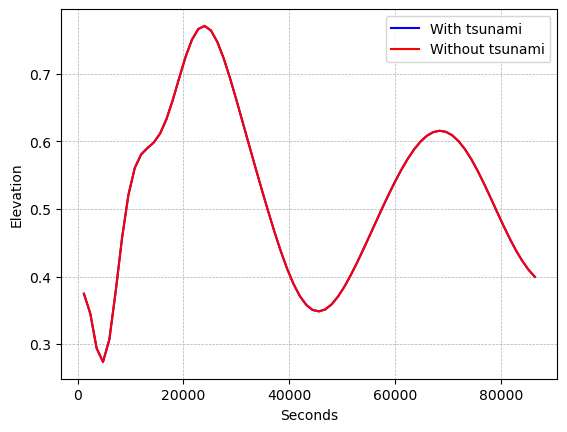

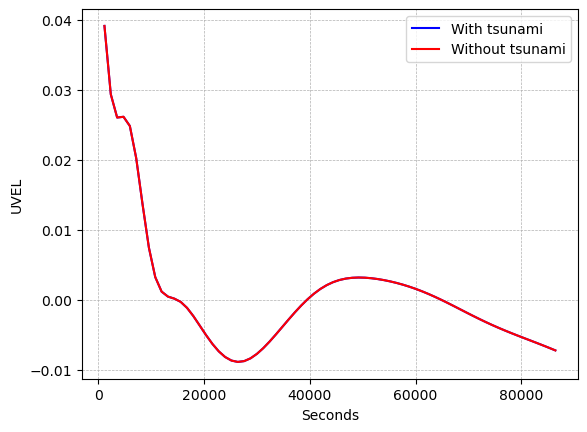

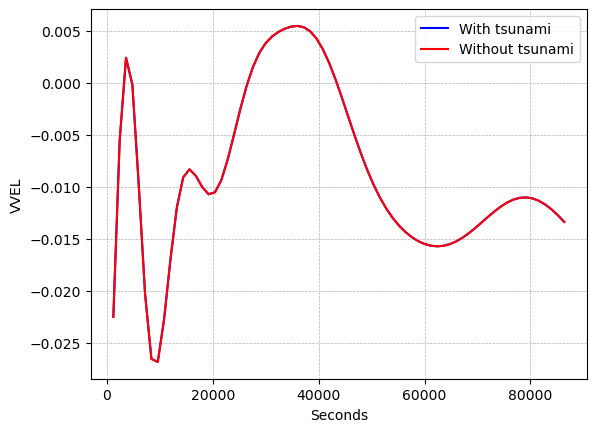

In [76]:
plt.plot(timestep_dates, elevation_tsunami_values,'b-',label='With tsunami')
plt.plot(timestep_dates, elevation_no_tsunami_values,'r-',label='Without tsunami')
plt.ylabel('Elevation')
plt.xlabel('Seconds')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()


plt.plot(timestep_dates, UVEL_tsunami_values,'b-',label='With tsunami')
plt.plot(timestep_dates, UVEL_no_tsunami_values,'r-',label='Without tsunami')
plt.ylabel('UVEL')
plt.xlabel('Seconds')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()


plt.plot(timestep_dates, VVEL_tsunami_values,'b-',label='With tsunami')
plt.plot(timestep_dates, VVEL_no_tsunami_values,'r-',label='Without tsunami')
plt.ylabel('VVEL')
plt.xlabel('Seconds')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

Doesn't make sense to me but the elevation and velocites are overall the same for both model simulations with or without tsunami. Despite the initial timesteps showing a clear difference in elevation/sea velocities at the spot where I simulated the tsunami. 

They are not exactly the same but the difference between elevation/velocities is so tiny that the effects of the tsunami might as well be nonexistent. 